<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.348495,31.894592,21.632837,63.286791,0.055902,163.218617,163.206813,0.011804
1,0.0,1.0,57.161678,33.434127,42.578469,71.261520,0.133350,214.569144,214.484890,0.084254
2,0.0,2.0,55.723606,22.774772,95.862230,33.269273,-0.121681,217.508199,217.633532,-0.125333
3,0.0,3.0,85.985734,98.709875,31.742324,36.960861,0.000650,263.399444,263.392802,0.006642
4,0.0,4.0,68.253511,29.766497,35.850035,29.846437,0.098200,173.814681,173.741484,0.073196
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.814265,74.035957,43.105124,39.589561,-0.066489,218.478417,218.550579,-0.072162
19996,999.0,16.0,68.050332,24.304751,30.406790,90.205799,-0.094047,222.873626,222.934804,-0.061178
19997,999.0,17.0,38.438888,59.740294,22.800840,78.804927,0.049959,209.834908,209.751856,0.083053
19998,999.0,18.0,45.529815,52.929794,58.682043,78.650432,-0.060831,245.731253,245.770664,-0.039410


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.348495,31.894592,21.632837,63.286791,0.055902,163.218617,163.206813,0.011804
1,0.0,1.0,57.161678,33.434127,42.578469,71.261520,0.133350,214.569144,214.484890,0.084254
2,0.0,2.0,55.723606,22.774772,95.862230,33.269273,-0.121681,217.508199,217.633532,-0.125333
3,0.0,3.0,85.985734,98.709875,31.742324,36.960861,0.000650,263.399444,263.392802,0.006642
4,0.0,4.0,68.253511,29.766497,35.850035,29.846437,0.098200,173.814681,173.741484,0.073196
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.814265,74.035957,43.105124,39.589561,-0.066489,218.478417,218.550579,-0.072162
19996,999.0,16.0,68.050332,24.304751,30.406790,90.205799,-0.094047,222.873626,222.934804,-0.061178
19997,999.0,17.0,38.438888,59.740294,22.800840,78.804927,0.049959,209.834908,209.751856,0.083053
19998,999.0,18.0,45.529815,52.929794,58.682043,78.650432,-0.060831,245.731253,245.770664,-0.039410


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.348495  31.894592  21.632837  63.286791  0.055902  163.218617   
      1.0    57.161678  33.434127  42.578469  71.261520  0.133350  214.569144   
      2.0    55.723606  22.774772  95.862230  33.269273 -0.121681  217.508199   
      3.0    85.985734  98.709875  31.742324  36.960861  0.000650  263.399444   
      4.0    68.253511  29.766497  35.850035  29.846437  0.098200  173.814681   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   51.814265  74.035957  43.105124  39.589561 -0.066489  218.478417   
      16.0   68.050332  24.304751  30.406790  90.205799 -0.094047  222.873626   
      17.0   38.438888  59.740294  22.800840  78.804927  0.049959  209.834908   
      18.0   45.529815  52.929794  58.682043  78.650432 -0.060831  245.731253   
      19.0   23.916333  77.244241  77.507430  62.985704 -0.024347  251.629362   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    163.206813  0.011804  
      1.0    214.484890  0.084254  
      2.0    217.633532 -0.125333  
      3.0    263.392802  0.006642  
      4.0    173.741484  0.073196  
...                 ...       ...  
999.0 15.0   218.550579 -0.072162  
      16.0   222.934804 -0.061178  
      17.0   209.751856  0.083053  
      18.0   245.770664 -0.039410  
      19.0   251.643882 -0.014520  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.348495  31.894592  21.632837  63.286791  0.055902  163.218617   
      1.0    57.161678  33.434127  42.578469  71.261520  0.133350  214.569144   
      2.0    55.723606  22.774772  95.862230  33.269273 -0.121681  217.508199   
      3.0    85.985734  98.709875  31.742324  36.960861  0.000650  263.399444   
      4.0    68.253511  29.766497  35.850035  29.846437  0.098200  173.814681   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   51.814265  74.035957  43.105124  39.589561 -0.066489  218.478417   
      16.0   68.050332  24.304751  30.406790  90.205799 -0.094047  222.873626   
      17.0   38.438888  59.740294  22.800840  78.804927  0.049959  209.834908   
      18.0   45.529815  52.929794  58.682043  78.650432 -0.060831  245.731253   
      19.0   23.916333  77.244241  77.507430  62.985704 -0.024347  251.629362   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    163.206813  0.011804  
      1.0    214.484890  0.084254  
      2.0    217.633532 -0.125333  
      3.0    263.392802  0.006642  
      4.0    173.741484  0.073196  
...                 ...       ...  
999.0 15.0   218.550579 -0.072162  
      16.0   222.934804 -0.061178  
      17.0   209.751856  0.083053  
      18.0   245.770664 -0.039410  
      19.0   251.643882 -0.014520  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.348495,31.894592,21.632837,63.286791,0.055902,163.218617,163.206813,0.011804
1,0.0,1.0,57.161678,33.434127,42.578469,71.261520,0.133350,214.569144,214.484890,0.084254
2,0.0,2.0,55.723606,22.774772,95.862230,33.269273,-0.121681,217.508199,217.633532,-0.125333
3,0.0,3.0,85.985734,98.709875,31.742324,36.960861,0.000650,263.399444,263.392802,0.006642
4,0.0,4.0,68.253511,29.766497,35.850035,29.846437,0.098200,173.814681,173.741484,0.073196
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.814265,74.035957,43.105124,39.589561,-0.066489,218.478417,218.550579,-0.072162
19996,999.0,16.0,68.050332,24.304751,30.406790,90.205799,-0.094047,222.873626,222.934804,-0.061178
19997,999.0,17.0,38.438888,59.740294,22.800840,78.804927,0.049959,209.834908,209.751856,0.083053
19998,999.0,18.0,45.529815,52.929794,58.682043,78.650432,-0.060831,245.731253,245.770664,-0.039410


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.348495  31.894592  21.632837  63.286791  0.055902  163.218617   
      1.0    57.161678  33.434127  42.578469  71.261520  0.133350  214.569144   
      2.0    55.723606  22.774772  95.862230  33.269273 -0.121681  217.508199   
      3.0    85.985734  98.709875  31.742324  36.960861  0.000650  263.399444   
      4.0    68.253511  29.766497  35.850035  29.846437  0.098200  173.814681   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   51.814265  74.035957  43.105124  39.589561 -0.066489  218.478417   
      16.0   68.050332  24.304751  30.406790  90.205799 -0.094047  222.873626   
      17.0   38.438888  59.740294  22.800840  78.804927  0.049959  209.834908   
      18.0   45.529815  52.929794  58.682043  78.650432 -0.060831  245.731253   
      19.0   23.916333  77.244241  77.507430  62.985704 -0.024347  251.629362   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    163.206813  0.011804  
      1.0    214.484890  0.084254  
      2.0    217.633532 -0.125333  
      3.0    263.392802  0.006642  
      4.0    173.741484  0.073196  
...                 ...       ...  
999.0 15.0   218.550579 -0.072162  
      16.0   222.934804 -0.061178  
      17.0   209.751856  0.083053  
      18.0   245.770664 -0.039410  
      19.0   251.643882 -0.014520  

[20000 rows x 8 columns]

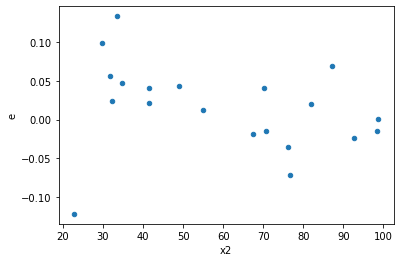

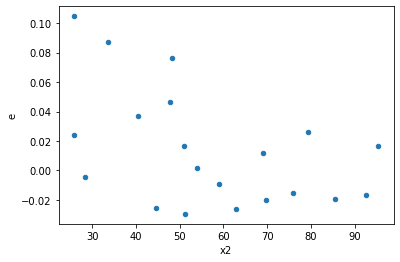

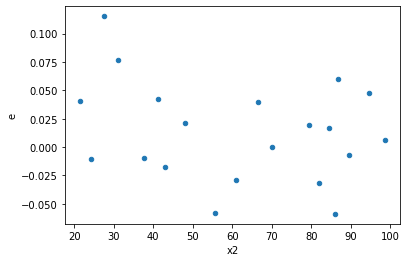

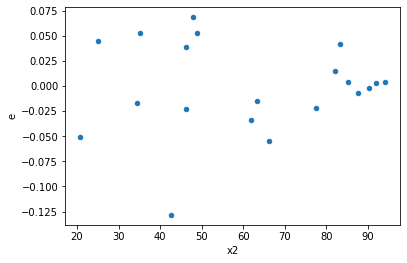

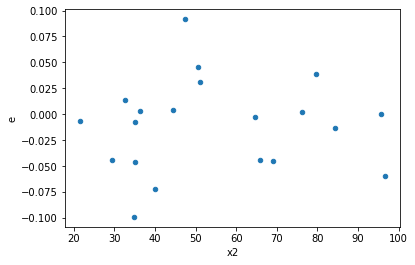

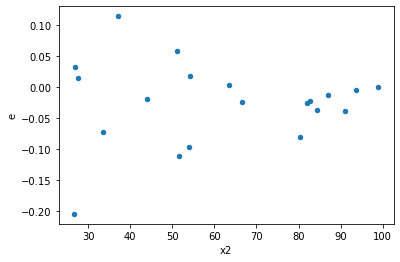

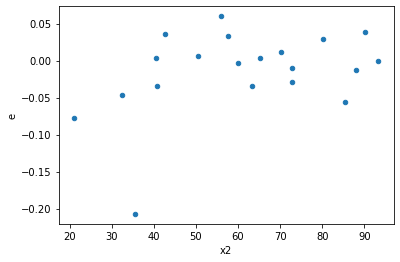

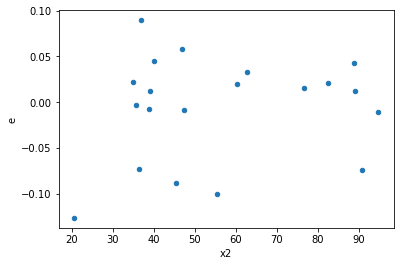

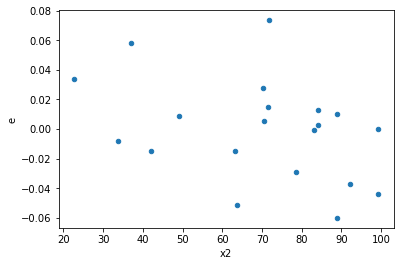

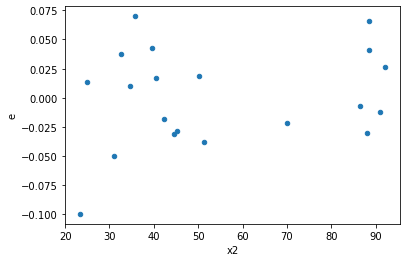

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,0.002995439259780624,0.0053849881240283564,0.000748859814945156,0.0013462470310070891,1.7977290330443005,0.5838892250753522,0.7080553874623239,0.2919446125376761,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.002124769298046473,0.0030166525667074252,0.0005311923245116182,0.0007541631416768563,1.419755344488908,0.7424047844136084,0.6287976077931958,0.3712023922068042,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.0034566033952842566,0.00433366719993878,0.0008641508488210642,0.001083416799984695,1.2537357354480054,0.8318367533212461,0.584081623339377,0.41591837666062303,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.014139142470742435,0.020729509345615727,0.0035347856176856087,0.005182377336403932,1.4661079615337689,0.7198676831892219,0.640066158405389,0.35993384159461095,Reject001=1 : Homoscedasticity
15.0,4.0,4.0,0.005348678196146266,0.0054876322037974,0.0013371695490365665,0.00137190805094935,1.0259791302739527,0.9807665543226998,0.5096167228386501,0.4903832771613499,Reject001=1 : Homoscedasticity
18.0,4.0,4.0,0.005588087030167968,0.007525248227295572,0.001397021757541992,0.001881312056823893,1.3466590957996185,0.7800250771210888,0.6099874614394556,0.3900125385605444,Reject001=1 : Homoscedasticity
20.0,4.0,4.0,0.010091368220446562,0.011337062526188888,0.0025228420551116405,0.002834265631547222,1.1234415669441504,0.9128990536777821,0.5435504731611089,0.45644952683889106,Reject001=1 : Homoscedasticity
22.0,4.0,4.0,0.002662581796722504,0.0030706413331374064,0.000665645449180626,0.0007676603332843516,1.1532570893848977,0.8934184639942084,0.5532907680028958,0.4467092319971042,Reject001=1 : Homoscedasticity
29.0,4.0,4.0,0.0009551677832712873,0.002106660302636148,0.00023879194581782182,0.000526665075659037,2.2055395287948203,0.46247556721627614,0.7687622163918619,0.23123778360813807,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.010888566134381569,0.0039013868328536135,0.0027221415335953922,0.0009753467082134034,0.3583012478139481,0.3440788585191423,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.002995439259780624,0.0053849881240283564,0.000748859814945156,0.0013462470310070891,1.7977290330443005,0.5838892250753522,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,0.006315768392020185,0.0007114463537450175,0.0015789420980050462,0.00017786158843625436,0.11264604868093518,0.05734830268811383,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.006484477747647913,0.00117176652056085,0.0016211194369119782,0.0002929416301402125,0.1807032988872357,0.12620105545857208,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.002124769298046473,0.0030166525667074252,0.0005311923245116182,0.0007541631416768563,1.419755344488908,0.7424047844136084,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.0084178605420242,0.004152685651727103,0.00210446513550605,0.0010381714129317759,0.49331841873547216,0.5105820769552809,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.0034566033952842566,0.00433366719993878,0.0008641508488210642,0.001083416799984695,1.2537357354480054,0.8318367533212461,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.014139142470742435,0.020729509345615727,0.0035347856176856087,0.005182377336403932,1.4661079615337689,0.7198676831892219,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.010437321856779846,0.001695870494663285,0.0026093304641949615,0.00042396762366582127,0.16248138343666066,0.10629361313266744,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      938
Reject001=0 : Heteroscedasticity     62
Name: Result_test, dtype: int64